final 1- models
1. ridge 

In [1]:
cd /home/jovyan/ames-Iowa-dataset-analysis

/home/jovyan/ames-Iowa-dataset-analysis


In [43]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split

In [3]:
%matplotlib inline

In [4]:
%run src/load_data.py

In [5]:
housing = pd.read_csv('./data/housing.csv')

In [6]:
whos DataFrame

Variable                     Type         Data/Info
---------------------------------------------------
housing                      DataFrame          Unnamed: 0  MSSubCl<...>n[1460 rows x 81 columns]
housing_df                   DataFrame         MSSubClass MSZoning <...>n[1451 rows x 80 columns]
housing_ouliers_removed_df   DataFrame         MSSubClass MSZoning <...>n[1437 rows x 80 columns]
listing_df                   DataFrame            Id Street Alley  <...>n[1460 rows x 62 columns]
numeric_df                   DataFrame          LotFrontage  LotAre<...>n[1451 rows x 23 columns]
numeric_final_df             DataFrame          LotFrontage   LotAr<...>n[1437 rows x 23 columns]
numeric_log_df               DataFrame          LotFrontage    LotA<...>n[1451 rows x 23 columns]
numeric_log_sc_df            DataFrame          LotFrontage   LotAr<...>n[1451 rows x 23 columns]
numeric_sc_df                DataFrame          LotFrontage   LotAr<...>n[1451 rows x 23 columns]
sale_df       

**One hot encode**

In [7]:
cat = housing_df.select_dtypes(include=['category'])
cate = pd.get_dummies(cat)

features = pd.merge(cate, housing_df.select_dtypes(exclude=['category']), left_index=True, right_index=True)


In [8]:
data_target = features['SalePrice']

In [9]:
data_var = features.drop(labels='SalePrice', axis=1)


In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    data_var, data_target, test_size=0.3, random_state=42)

In [11]:
from sklearn.linear_model import Ridge
ridge = Ridge()

ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [12]:
ridge.score(X_train, y_train)

0.94237912124562706

In [38]:
ridge.score(X_test, y_test)

0.82244776793472674

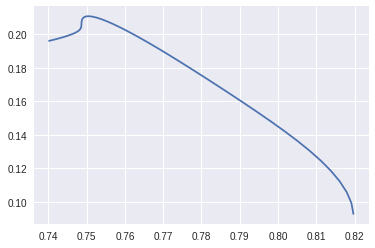

In [14]:

X = data_var
y = data_target
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

ridge = Ridge(normalize=True)

for alpha in alpha_space:

    ridge.alpha = alpha

    ridge_cv_scores = cross_val_score(ridge, X_train, y_train, cv=5)
    
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    ridge_scores_std.append(np.std(ridge_cv_scores))


plt.plot(ridge_scores, ridge_scores_std)

**1. SVC model**

In [76]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train).score(X_test, y_test)

0.016055045871559634

In [87]:
params = [
 {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
 {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

In [88]:
gspipe = GridSearchCV(SVC(),
                      param_grid=params,
                      n_jobs=-1,
                      cv=ShuffleSplit(n_splits=5, random_state=42))

In [90]:
gspipe.fit(X_train, y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=42, test_size='default',
       train_size=None),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']}, {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [91]:
gspipe.best_score_

0.0078431372549019607

**2 pipeline**

In [21]:
from sklearn.pipeline import Pipeline

In [25]:
simple_pipe = Pipeline([('scaler',StandardScaler()), ('lasso', Lasso())])

In [26]:
simple_pipe.fit(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Pipeline(memory=None,
     steps=[('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('lasso', Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False))])

In [27]:
simple_pipe.score(X_train, y_train)

0.95610457495489642

In [28]:
simple_pipe.score(X_test, y_test)

0.72069878278939214

In [29]:
simple_pipe.steps
simple_pipe.named_steps
simple_pipe.steps[0][1].mean_

array([  3.56650246e-01,   4.92610837e-02,   3.94088670e-03,
         5.91133005e-03,   9.65517241e-02,   2.10837438e-01,
         4.72906404e-02,   1.18226601e-02,   4.23645320e-02,
         8.86699507e-03,   3.64532020e-02,   5.51724138e-02,
         4.82758621e-02,   4.92610837e-03,   2.16748768e-02,
         5.91133005e-03,   4.13793103e-02,   9.85221675e-03,
         7.86206897e-01,   1.56650246e-01,   3.32019704e-01,
         2.95566502e-02,   7.88177340e-03,   6.30541872e-01,
         4.03940887e-02,   3.84236453e-02,   2.56157635e-02,
         8.95566502e-01,   9.99014778e-01,   9.85221675e-04,
         1.95073892e-01,   7.09359606e-02,   3.05418719e-02,
         1.97044335e-03,   7.01477833e-01,   9.44827586e-01,
         4.53201970e-02,   9.85221675e-03,   1.37931034e-02,
         9.85221675e-04,   1.47783251e-02,   4.03940887e-02,
         2.16748768e-02,   9.95073892e-02,   3.54679803e-02,
         6.69950739e-02,   5.32019704e-02,   2.46305419e-02,
         1.18226601e-02,

In [30]:
simple_pipe.named_steps['scaler'].scale_

In [31]:
from sklearn.pipeline import make_pipeline

lasso

In [32]:
another_pipe = make_pipeline(StandardScaler(),
                             Lasso())

In [34]:
another_pipe.fit(X_train, y_train)
another_pipe.score(X_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.95610457495489642

In [35]:
another_pipe.score(X_test, y_test)

In [52]:
from sklearn.model_selection import GridSearchCV, ShuffleSplit
from sklearn.linear_model import ElasticNet
import sklearn.feature_selection
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import SelectFromModel

In [53]:
pipe_for_gs = Pipeline([
    ('skb', SelectKBest(score_func=f_regression, k=40)),
    ('scaler', StandardScaler()),
    ('sfm', SelectFromModel(Lasso())),
    ('regr', ElasticNet())
])

In [59]:
params = {
    'regr__l1_ratio':[.1,.3,.5,.7,.9],
    'regr__alpha':np.logspace(-3,3,7)
}

In [60]:
gspipe = GridSearchCV(pipe_for_gs,
                      param_grid=params,
                      n_jobs=-1,
                      cv=ShuffleSplit(n_splits=5, random_state=42))

In [61]:
gspipe.fit(X_train, y_train.ravel())

In [63]:
gspipe.best_score_

0.79137826422694679

In [64]:
gspipe_results = pd.DataFrame(gspipe.cv_results_)

gspipe_results.sort_values('rank_test_score', ascending=True).T

/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/opt/conda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:1

,64,68,60,96,72,76,40,44,48,69,...,125,120,135,121,130,131,126,127,122,123
mean_fit_time,0.0509321,0.0517353,0.0434823,0.0496902,0.0516068,0.0495643,0.0493138,0.0475366,0.0474107,0.0288852,...,0.0274565,0.0469326,0.00887723,0.0284831,0.00897145,0.00979552,0.0088058,0.00832796,0.00872126,0.00887065
mean_score_time,0.000846195,0.000880241,0.000854397,0.00101428,0.000871229,0.000871515,0.000854349,0.000852919,0.000869751,0.000784111,...,0.000806141,0.00086832,0.000790215,0.000839996,0.000810909,0.000948477,0.000811863,0.000787735,0.000792074,0.000783062
mean_test_score,0.791378,0.791038,0.790106,0.789046,0.787892,0.778927,0.778184,0.776554,0.774672,0.774662,...,0.021565,0.0188228,0.0181643,0.0164336,0.0130621,0.0101075,0.00874781,0.00660796,0.00633337,0.00465153
mean_train_score,0.838624,0.844258,0.833029,0.8302,0.849965,0.855886,0.856196,0.85681,0.857431,0.83364,...,0.0243805,0.0215737,0.0215725,0.0191644,0.0161253,0.0131276,0.0116324,0.00946061,0.00911824,0.00741085
param_regr__alpha,1,1,1,10,1,1,0.1,0.1,0.1,1,...,1000,1000,1000,1000,1000,1000,1000,1000,1000,1000
param_regr__l1_ratio,0.3,0.5,0.1,0.9,0.7,0.9,0.1,0.3,0.5,0.5,...,0.3,0.1,0.7,0.1,0.5,0.5,0.3,0.3,0.1,0.1
param_sfm__estimator,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...","Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...","Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...","Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...","Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...","Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...","Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...","Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...","Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...","Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...",...,"Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...","Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...","Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...","Lasso(alpha=1.0, copy_X=True, fit_intercept=Tr...","Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...","Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...","Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...","Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...","Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...","Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr..."
param_skb__k,50,50,50,50,50,50,50,50,50,40,...,40,50,40,40,50,40,50,40,50,40
params,"{'regr__alpha': 1.0, 'regr__l1_ratio': 0.3, 's...","{'regr__alpha': 1.0, 'regr__l1_ratio': 0.5, 's...","{'regr__alpha': 1.0, 'regr__l1_ratio': 0.1, 's...","{'regr__alpha': 10.0, 'regr__l1_ratio': 0.9, '...","{'regr__alpha': 1.0, 'regr__l1_ratio': 0.7, 's...","{'regr__alpha': 1.0, 'regr__l1_ratio': 0.9, 's...","{'regr__alpha': 0.1, 'regr__l1_ratio': 0.1, 's...","{'regr__alpha': 0.1, 'regr__l1_ratio': 0.3, 's...","{'regr__alpha': 0.1, 'regr__l1_ratio': 0.5, 's...","{'regr__alpha': 1.0, 'regr__l1_ratio': 0.5, 's...",...,"{'regr__alpha': 1000.0, 'regr__l1_ratio': 0.3,...","{'regr__alpha': 1000.0, 'regr__l1_ratio': 0.1,...","{'regr__alpha': 1000.0, 'regr__l1_ratio': 0.7,...","{'regr__alpha': 1000.0, 'regr__l1_ratio': 0.1,...","{'regr__alpha': 1000.0, 'regr__l1_ratio': 0.5,...","{'regr__alpha': 1000.0, 'regr__l1_ratio': 0.5,...","{'regr__alpha': 1000.0, 'regr__l1_ratio': 0.3,...","{'regr__alpha': 1000.0, 'regr__l1_ratio': 0.3,...","{'regr__alpha': 1000.0, 'regr__l1_ratio': 0.1,...","{'regr__alpha': 1000.0, 'regr__l1_ratio': 0.1,..."
rank_test_score,1,2,3,4,5,6,7,8,9,10,...,131,132,133,134,135,136,137,138,139,140


**3. K neighbor classifer**

In [66]:
X = data_var
y = data_target

In [67]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=3) 

In [68]:
knn.fit(X_train, y_train).score(X_test, y_test)

0.65510865516003669

In [71]:
from sklearn.model_selection import GridSearchCV
knc_params = { 'n_neighbors' : range(5,51,10) }

knc_gs = GridSearchCV(KNeighborsRegressor(),
                      knc_params, 
                      cv=ShuffleSplit(n_splits=5, random_state=42))
knc_gs.fit(X_train,y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=42, test_size='default',
       train_size=None),
       error_score='raise',
       estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(5, 51, 10)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [72]:
knc_gs.best_score_

0.62250566520872253

In [51]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

**LASSO**

In [34]:
from sklearn import linear_model


In [35]:
clf = linear_model.Lasso(alpha=0.1)

In [36]:
clf.fit(X_train, y_train).score(X_test, y_test)

/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.72542289992583942

**4. random forest regression model**

In [97]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()

In [102]:
rfr.fit(X_train, y_train).score(X_test, y_test)

0.83348203935818965

In [103]:
rfr_parm =  { 'max_depth' : range(1,50,1),
            'max_features' :range(1,103,1) }

In [108]:
from sklearn.model_selection import GridSearchCV

rfr_gs = GridSearchCV(RandomForestRegressor(),
                      rfr_parm, 
                      cv=ShuffleSplit(n_splits=5, random_state=42))
rfr_gs.fit(X_train,y_train)

GridSearchCV(cv=ShuffleSplit(n_splits=5, random_state=42, test_size='default',
       train_size=None),
       error_score='raise',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': range(1, 50), 'max_features': range(1, 103)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [109]:
rfr_gs.best_score_

0.8478432652355572

**Decision Tree**

In [73]:
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [74]:
dtree.score(X_test, y_test)

0.68559199480244937

**pipeline-lasso curve**

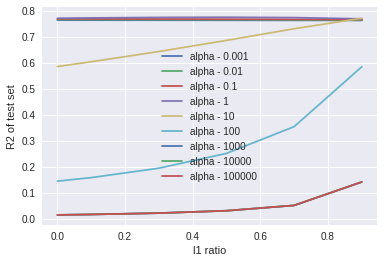

In [75]:
pipe_for_gs = Pipeline([
    ('skb', SelectKBest(score_func=f_regression, k=40)),
    ('scaler', StandardScaler()),
    ('sfm', SelectFromModel(Lasso())),
    ('regr', ElasticNet())
])

params = {
    'regr__l1_ratio':[0,.1,.3,.5,.7,.9], 
    'regr__alpha':np.logspace(-3,5,9) 
}

gspipe = GridSearchCV(pipe_for_gs,
                      param_grid=params,
                      n_jobs=-1,
                      cv=ShuffleSplit(n_splits=5, random_state=42))

from warnings import filterwarnings
filterwarnings('ignore')

gspipe.fit(X_train, y_train.ravel())

gspipe.best_score_

lasso_results = pd.DataFrame(gspipe.cv_results_)

lasso_0_001 = lasso_results[lasso_results.param_regr__alpha == 0.001]
lasso_0_01 = lasso_results[lasso_results.param_regr__alpha == 0.01]
lasso_0_1 = lasso_results[lasso_results.param_regr__alpha == 0.1]
lasso_1 = lasso_results[lasso_results.param_regr__alpha == 1]
lasso_10 = lasso_results[lasso_results.param_regr__alpha == 10]
lasso_100 = lasso_results[lasso_results.param_regr__alpha == 100]
lasso_1000 = lasso_results[lasso_results.param_regr__alpha == 1000]
lasso_10000 = lasso_results[lasso_results.param_regr__alpha == 10000]
lasso_100000 = lasso_results[lasso_results.param_regr__alpha == 100000]

plt.plot(lasso_0_001.param_regr__l1_ratio, lasso_0_001.mean_test_score, label='alpha - 0.001')
plt.plot(lasso_0_01.param_regr__l1_ratio, lasso_0_01.mean_test_score, label='alpha - 0.01')
plt.plot(lasso_0_1.param_regr__l1_ratio, lasso_0_1.mean_test_score, label='alpha - 0.1')
plt.plot(lasso_1.param_regr__l1_ratio, lasso_1.mean_test_score, label='alpha - 1')
plt.plot(lasso_10.param_regr__l1_ratio, lasso_10.mean_test_score, label='alpha - 10')
plt.plot(lasso_100.param_regr__l1_ratio, lasso_100.mean_test_score, label='alpha - 100')
plt.plot(lasso_1000.param_regr__l1_ratio, lasso_1000.mean_test_score, label='alpha - 1000')
plt.plot(lasso_10000.param_regr__l1_ratio, lasso_1000.mean_test_score, label='alpha - 10000')
plt.plot(lasso_100000.param_regr__l1_ratio, lasso_1000.mean_test_score, label='alpha - 100000')
plt.ylabel('R2 of test set')
plt.xlabel('l1 ratio')
plt.legend() 